In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
# load the data set using pandas
data=pd.read_csv('E:\Excelr-P269-Internship-Project-Group2-OIl-Price-Prediction-And-Forecasting-Using-Python\oil_prices_yahoo1.csv')

In [27]:
# covertnig the date column to datetime using pandas
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# creating a data frame using pandas
df=pd.DataFrame(data)

# renaming the column to price
df.rename(columns = {'Close':'Price'}, inplace = True)

In [28]:
print(df.head())
print(df.tail())

        Date      Price
0 2000-08-23  32.049999
1 2000-08-24  31.629999
2 2000-08-25  32.049999
3 2000-08-28  32.869999
4 2000-08-29  32.720001
           Date      Price
5746 2023-07-17  74.150002
5747 2023-07-18  75.750000
5748 2023-07-19  75.349998
5749 2023-07-20  75.629997
5750 2023-07-21  77.070000


In [29]:
# info function gives us the raw information of data such as any null values, data types e.t.c.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5751 non-null   datetime64[ns]
 1   Price   5751 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 90.0 KB


In [30]:
df.shape

(5751, 2)

In [31]:
# checking for the null values
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [32]:
import plotly.express as px
import plotly.graph_objs as go

# Create the interactive time series map
fig = px.line(df, x='Date', y='Price', title='Time Series Map')

# Add maximum price label
max_price = df['Price'].max()
max_date = df.loc[df['Price'] == max_price, 'Date'].iloc[0]
fig.add_annotation(x=max_date, y=max_price, text=f'Max Price: {max_price} on {max_date}', showarrow=True, arrowhead=1 ,font=dict(color='red'))

# Add minimum price label
min_price = df['Price'].min()
min_date = df.loc[df['Price'] == min_price, 'Date'].iloc[0]
fig.add_annotation(x=min_date, y=min_price, text=f'Min Price: {min_price} on {min_date}', showarrow=True, arrowhead=1 ,font=dict(color='red'))

# Show the plot
fig.show()


In [33]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by month and calculate the mean price for each month
monthly_data = df.groupby(pd.Grouper(key='Date', freq='M')).mean().reset_index()

# Create the interactive bar chart
fig = px.bar(monthly_data, x='Date', y='Price', title='Monthly Bar Chart')

# Add maximum price label
max_price = monthly_data['Price'].max()
max_date = monthly_data.loc[monthly_data['Price'] == max_price, 'Date'].iloc[0]
fig.add_annotation(x=max_date, y=max_price, text=f'Max Oil Price: {max_price} on {max_date.strftime("%Y-%m")}', showarrow=True, arrowhead=1, font=dict(color='red'))

# Add minimum price label
min_price = monthly_data['Price'].min()
min_date = monthly_data.loc[monthly_data['Price'] == min_price, 'Date'].iloc[0]
fig.add_annotation(x=min_date, y=min_price, text=f'Min Oil Price: {min_price} on {min_date.strftime("%Y-%m")}', showarrow=True, arrowhead=1, font=dict(color='black'))

# Show the plot
fig.show()


In [34]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Group the data by month and calculate the mean price for each month
yearly_data = df.groupby(pd.Grouper(key='Date', freq='Y')).mean().reset_index()

# Create the interactive bar chart
fig = px.bar(yearly_data, x='Date', y='Price', title='Yearly Bar Chart')

# Add maximum price label
max_price = yearly_data['Price'].max()
max_date = yearly_data.loc[yearly_data['Price'] == max_price, 'Date'].iloc[0]
fig.add_annotation(x=max_date, y=max_price, text=f'Max Oil Price: {max_price} on {max_date.strftime("%Y-%m")}', showarrow=True, arrowhead=1, font=dict(color='red'))

# Add minimum price label
min_price = yearly_data['Price'].min()
min_date = yearly_data.loc[yearly_data['Price'] == min_price, 'Date'].iloc[0]
fig.add_annotation(x=min_date, y=min_price, text=f'Min Oil Price: {min_price} on {min_date.strftime("%Y-%m")}', showarrow=True, arrowhead=1, font=dict(color='red'))

# Show the plot
fig.show()



In [35]:
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Pivot the data to create a matrix with dates as rows and columns as years
heatmap_data = df.pivot_table(index=df['Date'].dt.month, columns=df['Date'].dt.year, values='Price', aggfunc='mean')

# Create the interactive heatmap
fig = px.imshow(heatmap_data, title='Monthly Heatmap')

# Add year labels to y-axis
fig.update_yaxes(tickvals=list(range(len(heatmap_data.index))), ticktext=[calendar.month_name[i] for i in heatmap_data.index])

# Show the plot
fig.show()


In [36]:
# Pivot the data to create a matrix with dates as rows and columns as years
heatmap_data = df.pivot_table(index=df['Date'].dt.month, columns=df['Date'].dt.year, values='Price', aggfunc='mean')

# Find the minimum and maximum values in the heatmap data
min_value = heatmap_data.min().min()
max_value = heatmap_data.max().max()

print(f"The minimum value in the heatmap is: {min_value}")
print(f"The maximum value in the heatmap is: {max_value}")


The minimum value in the heatmap is: 16.699047678992862
The maximum value in the heatmap is: 134.01571437290735


In [37]:
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create the interactive scatterplot
fig = px.scatter(df, x='Date', y='Price', title='Scatterplot')

fig.show()


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

(<Figure size 1250x4080 with 25 Axes>,
 array([<Axes: ylabel='2000'>, <Axes: ylabel='2001'>,
        <Axes: ylabel='2002'>, <Axes: ylabel='2003'>,
        <Axes: ylabel='2004'>, <Axes: ylabel='2005'>,
        <Axes: ylabel='2006'>, <Axes: ylabel='2007'>,
        <Axes: ylabel='2008'>, <Axes: ylabel='2009'>,
        <Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2012'>, <Axes: ylabel='2013'>,
        <Axes: ylabel='2014'>, <Axes: ylabel='2015'>,
        <Axes: ylabel='2016'>, <Axes: ylabel='2017'>,
        <Axes: ylabel='2018'>, <Axes: ylabel='2019'>,
        <Axes: ylabel='2020'>, <Axes: ylabel='2021'>,
        <Axes: ylabel='2022'>, <Axes: ylabel='2023'>], dtype=object))

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

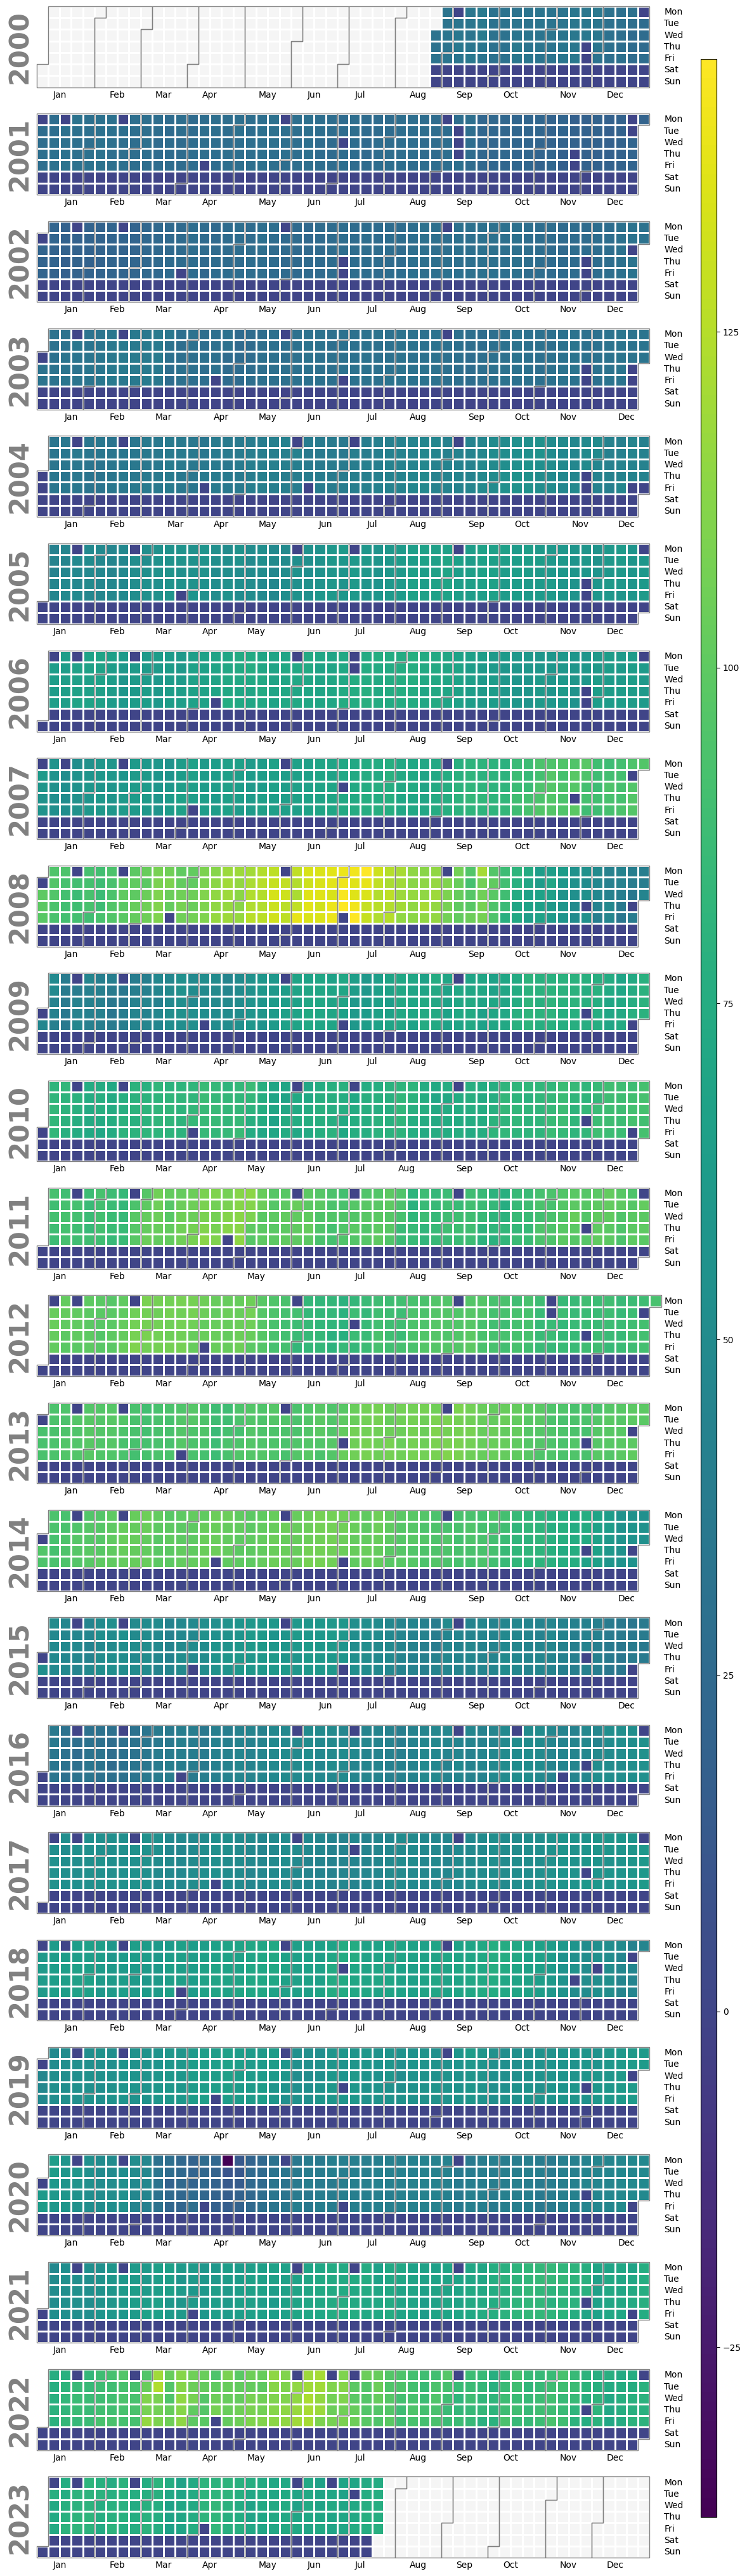

In [38]:
import calplot
# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Create a Series with the Date as the index and the Price as the values
data = pd.Series(df['Price'].values, index=df['Date'])

# Create the interactive calendar heatmap
calplot.calplot(data)


In [39]:
import plotly.graph_objs as go
import pandas as pd
from scipy.signal import periodogram

# Calculate the periodogram
f, Pxx = periodogram(df['Price'])

# Create the interactive spectral density plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=f, y=Pxx))
fig.update_layout(title='Spectral Density Plot', xaxis_title='Frequency', yaxis_title='Power')
fig.show()


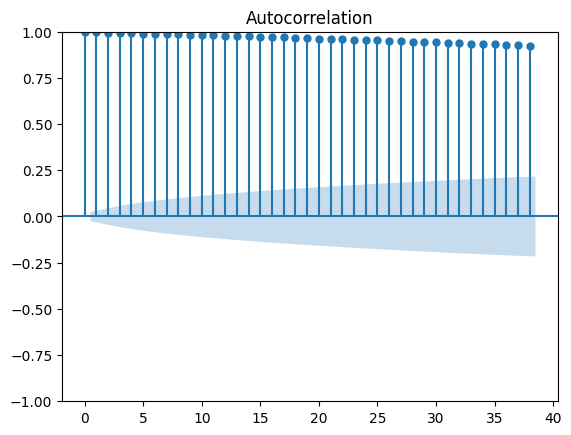

In [40]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Select relevant data, index by Date
data = df[['Date', 'Price']].set_index(['Date'])

# Calculate the ACF (via statsmodel)
plot_acf(data)

# Show the data as a plot (via matplotlib)
plt.show()


In [41]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Select relevant data, index by Date
data = df[['Date', 'Price']]

# Convert the Date column to a DatetimeIndex with a specified frequency
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index(['Date'])
data = data.asfreq('D')

# Fill in missing values using interpolation
data = data.interpolate()

# Decompose the time series data to extract the seasonal component (via statsmodel)
result = seasonal_decompose(data, model='additive')

# Convert the seasonal component to a DataFrame
seasonal_df = pd.DataFrame({'Date': result.seasonal.index, 'Seasonal': result.seasonal.values})

# Plot the seasonal component using plotly
fig = px.line(seasonal_df, x='Date', y='Seasonal')
fig.show()


In [42]:
import pandas as pd
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Select relevant data, index by Date
data = df[['Date', 'Price']]

# Convert the Date column to a DatetimeIndex with a specified monthly frequency
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index(['Date'])
data = data.asfreq('MS')

# Fill in missing values using interpolation
data = data.interpolate()

# Decompose the time series data to extract the seasonal component (via statsmodel)
result = seasonal_decompose(data, model='additive')

# Convert the seasonal component to a DataFrame
seasonal_df = pd.DataFrame({'Date': result.seasonal.index, 'Seasonal': result.seasonal.values})

# Plot the seasonal component using plotly
fig = px.line(seasonal_df, x='Date', y='Seasonal')
fig.show()


In [43]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Select relevant data, index by Date
data = df[['Date', 'Price']].set_index(['Date'])

# Perform the ADF test (via statsmodel)
result = adfuller(data['Price'])

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.696204
p-value: 0.074698
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


the ADF ("Augmented Dickey-Fuller") statistic is -2.696204 and the p-value is 0.074698. The critical values for the test at the 1%, 5%, and 10% significance levels are -3.431, -2.862, and -2.567, respectively. This means that if the ADF statistic is less than (more negative than) the critical value at a given significance level, we can reject the null hypothesis and conclude that the time series is stationary at that significance level.

In [45]:
import plotly.express as px
import pandas as pd

# Calculate the trend
df['Trend'] = df['Price'].rolling(window=12).mean()

# Create the plot
fig = px.line(df, x=df.index, y=['Price', 'Trend'], title='Trend Analysis of Price')
fig.show()


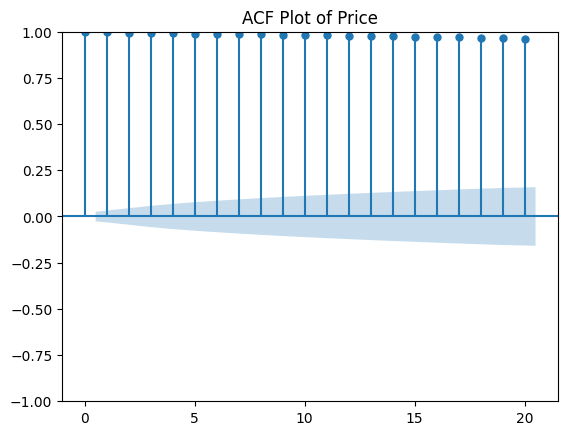

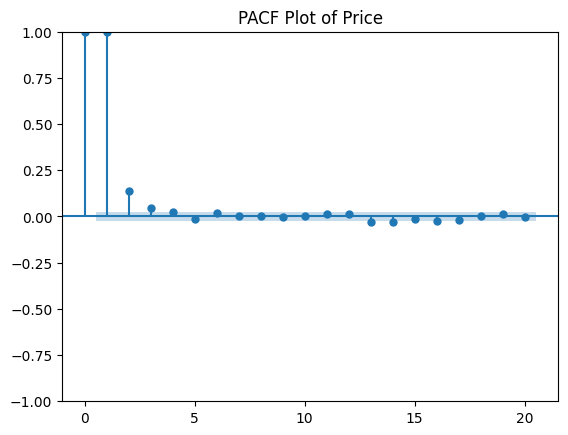

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Price'], lags=20)
plt.title('ACF Plot of Price')
plt.show()

plot_pacf(df['Price'], lags=20)
plt.title('PACF Plot of Price')
plt.show()


ACF - it appears that there is some positive autocorrelation at certain lags. This could suggest that there is some underlying pattern or trend in the price data.
PACF - it appears that there is a sharp drop from 1.00 to 0.00 at the 0 mark on the x-axis. This could suggest that there is some underlying pattern or trend in the price data.

In [47]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Price'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.696204
p-value: 0.074698
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
